# Exam 1, Fall 2021 (100 pts total)

files needed = ('2021-02.csv', 'invest.csv', 'phil.xls'), which can be found in `exam1_data_f21.zip`

You have 75 minutes to complete this exam.

Answer all the questions below in this notebook. You should insert as many cells into the notebook as you need. When you are finished, upload your finished notebook to Canvas. 

* You may use your notes and the Internet, but you cannot work with others.  
* Import any packages you need to complete this exam.
* Do not modify the data files directly. All data manipulation should happen in your code.

Remember, jupyter notebooks and python have lots of built-in help facilities. 

If you have a question, I am available at this zoom link: https://uwmadison.zoom.us/j/93329158371?pwd=czFVV0dNUmQwenJ6VXFCMEtJUEJRUT09 

## Question 0 (5 pts): Yuan, Meng
 
Replace 'Last, First' above with your actual name. Enter it as: last name, first name.

## Question 1 (10 pts): Visualization


Go to this [link](http://kjrs3.com/misc/exam1_f21_q1.pdf).  It is a plot of the consumer price index (CPI), which is the average price in the United States at each point in time.  It uses the default figure settings from the FRED database.

The *inflation rate* is the growth rate of the CPI. 

Insert a markdown cell below, and answer the following questions. 

1. I want to include this figure in a research paper that will be printed out in black and white and distributed. How would you change this figure? 

2. I want the message to be: "the inflation rate in 2021 is high compared to its values since 2000." How would you change this figure?



# Question 1 

1. I would change the figure code like:
When i assume that the dataset name is cpi and the year values is 'year' and cpi value is 'cpi_data'.
```
ax.plot(cpi['year'], cpi['cpi_data'], linewidth = 2.0,  color = 'black')
```
2. I will add a code like
```
ax.text(75, 75, 'The inflation rate in 2021 is high compared to its values since 2000', fontsize = 16)
```

## Question 2 (20 pts): Functions and flow control

Write a function that takes two argumens: a list of weights ($\omega$) and a list of values ($x$). There are $N$ values and weights. The function should return the weighted average of the values. 

$$
\text{weighted average} = \sum_{i=0}^N(\omega_i x_i)
$$

Use your function to compute the weighted average of the list `values` using the weights `weights`. Print out the weighted average as 

"The weighted average is ??.??." Replace the ??.?? with the weighted average. 

```python
weights = [0.1, 0.2, 0.05, 0.1, 0.15, 0.35, 0.03, 0.02]
values = [25, 75, 33, 26, 87, 64, 21, 55]
```

In [10]:
# question 2

def weighted_average(w, x):
    w_a = []
    for i in range(len(w)):
        w_a.append(w[i] * x[i])
    return w_a

weights = [0.1, 0.2, 0.05, 0.1, 0.15, 0.35, 0.03, 0.02]
values = [25, 75, 33, 26, 87, 64, 21, 55]

weighted_average_values = weighted_average(weights, values)

for j in range(len(weighted_average_values)):
    print("The weighted average is {:.2f}".format(weighted_average_values[j]))


The weighted average is 2.50
The weighted average is 15.00
The weighted average is 1.65
The weighted average is 2.60
The weighted average is 13.05
The weighted average is 22.40
The weighted average is 0.63
The weighted average is 1.10



## Question 3 (20 pts): Selecting data from a DataFrame 

Load the file '2021-02.csv'. It contains U.S. imports by 10-digit harmonized system code, by country, for February 2021. 

An observation (row of the data) is the imports of a good from a country in Feburary 2021.

The variables of interest: 

* `I_COMMODITY` = The code that identifies the type of good. Example:  6505002590 is the code for "knitted hats."
* `CTY_CODE` = The code that identifies the exporting country. Example: 2010 is the code for "Mexico."
* `GEN_VAL_MO` = The value of imports of the good


Use python and pandas to answer the following questions.


1. How many countries have positive `GEN_VAL_MO` for `I_COMMODITY` 6505002590? Print the answer as 

"There are ?? countries with positive exports of 6505002590." Replace ?? with your answer.

In [12]:
# question 3 
#1
import pandas as pd

us_import1 = pd.read_csv("2021-02.csv", usecols=[0,5,11])

pos_export = us_import1.loc[(us_import1.GEN_VAL_MO > 0) & (us_import1.I_COMMODITY ==6505002590), 'GEN_VAL_MO'].count()

print("There are {0:.0f} countries with positive exports of 6505002590.".format(pos_export))

There are 38 countries with positive exports of 6505002590.


2.  For this question
    1. Compute the total value of imports of commodity 6505002590. 
    2. Compute the total value of imports of commodity 6505002590 **that are from country 2010.** 
    3. Report the share of total imports of commodity 6505002590 **that come from Mexico.** Report it as

"The share of total imports of commodity 6505002590 from Mexico is ?.?? percent."  

Replace the ?.?? with your answer. 

In [24]:
#2
total_value = us_import1.loc[(us_import1.GEN_VAL_MO > 0) & (us_import1.I_COMMODITY ==6505002590), 'GEN_VAL_MO'].sum()

mexico_value = us_import1.loc[(us_import1.GEN_VAL_MO > 0) & (us_import1.I_COMMODITY ==6505002590) & (us_import1.CTY_CODE == 2010), 'GEN_VAL_MO'].sum()

share = mexico_value / total_value 

print("The share of total imports of commodity 6505002590 from Mexico is {0:.2f} percent.".format(share*100))

The share of total imports of commodity 6505002590 from Mexico is 3.07 percent.


3. Create a new DataFrame that contains only the columns `CTY_CODE`, `I_COMMODITY`, `VES_VAL_MO`, and `AIR_VAL_MO`. Drop all rows from this new DataFrame that do not have strictly positive values for **both** `VES_VAL_MO` and `AIR_VAL_MO`.

Report the number of rows and columns in your new DataFrame as 

"There are ????? rows and ? columns in the new DataFrame." 

Replace ? with the number of rows and ????? with the number of columns.

In [43]:
#3
us_import2 = pd.read_csv("2021-02.csv", usecols=[2,3,5,11]
us_import3 = us_import2.loc[(us_import2.VES_VAL_MO >0) & (us_import2.AIR_VAL_MO > 0)]

cols = len(us_import3.sum(axis=1))
rows = len(us_import3.sum(axis=0))

print("There are {0} rows and {1} columns in the new DataFrame.".format(rows, cols))

There are 4 rows and 36269 columns in the new DataFrame.


## Question 4 (15 pts): Loading messy data

The file 'invest.csv' contains quarterly U.S. private nonresidentrial fixed investment (PNFI). 

1. Load the file into a DataFrame. Print out 3 random rows from your DataFrame.

In [47]:
# question 4
#1
invest_data = pd.read_csv("invest.csv", header = 11)

invest_data.sample(3)


,observation_date,PNFI
207,1998-10-01,"1,295,444,000,000.00"
31,1954-10-01,"38,890,000,000.00"
263,2012-10-01,"2,148,622,000,000.00"


2. Print out: "Average investment is is ???,???,???,???." 

   Replace the ???,???,???,??? with the average PNFI. Note the commas separating the thousands and no digits to the right of the decimal point.

In [60]:
#2
invest_data['PNFI'] = invest_data['PNFI'].str.replace(',','')
invest_data['PNFI'] = invest_data['PNFI'].astype(float)

average1 = invest_data['PNFI'].mean()

print("Average investment is is {0:,.0f}.".format(average1))

Average investment is is 843,439,285,235.


## Question 5 (30 pts): Plotting

The file 'phil.xls' contains the U.S. unemployment rate and inflation rate. Use these data to recreate the figure below.  Some details:
 
* The title font size is 20
* The y-axis and y-axis label font size is 16
* Adjust the size of the data markers (the stars) so that they are larger than the default. Do not make them so large that they are hard to read, though.
* The x-axis min and max are (2, 15)

![alt](http://kjrs3.com/misc/exam1_f21_q5.png)

In [101]:
# question 5 
import matplotlib.pyplot as plt
phil_data = pd.read_excel("phil.xls")


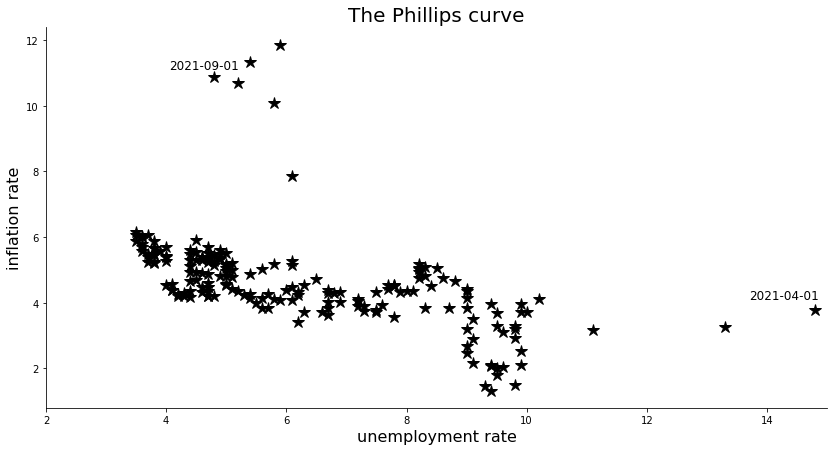

In [100]:
# Set the basics for the plot.
fig, ax = plt.subplots(figsize=(14,7))
ax.plot(phil_data.unemp, phil_data.infl, linestyle = 'None',  marker = '*', markersize=12, color = "black")

# Set the title and the x and y lables.
ax.set_title('The Phillips curve', fontsize = 20)
ax.set_ylabel('inflation rate', fontsize = 16)
ax.set_xlabel('unemployment rate', fontsize = 16)

# Set the test for the plot.
ax.text(4.05, 11.1, '2021-09-01', fontsize = 12)
ax.text(13.7,4.1, '2021-04-01', fontsize = 12)


# Adjust the frame of plot.
ax.set_xlim(2, 15)
ax.spines['right'].set_visible(False) 
ax.spines['top'].set_visible(False)  

plt.show()

### You are finished!
Upload your completed notebook to Canvas.